In [13]:
import requests
from bs4 import BeautifulSoup

def download_and_extract_text(url, output_file):
    # Отправляем GET-запрос к сайту
    response = requests.get(url)

    # Проверяем, успешно ли выполнен запрос
    if response.status_code == 200:
        # Используем BeautifulSoup для парсинга HTML
        soup = BeautifulSoup(response.content, 'html.parser')

        # Извлекаем текст из HTML
        text = soup.get_text()

        # Сохраняем текст в файл
        with open(output_file, 'w', encoding='utf-8') as file:
            file.write(text)

        print(f"Текст успешно сохранен в файл {output_file}")
    else:
        print(f"Не удалось загрузить сайт. Код состояния: {response.status_code}")

# Пример использования
url = 'https://bsnlp.cs.helsinki.fi/bsnlp-2019/'
output_file = 'output.txt'
download_and_extract_text(url, output_file)

Текст успешно сохранен в файл output.txt


In [14]:
!ls

brexit_documents  output.txt  sample_data


In [21]:
import pandas as pd

data = {
  'document_id': ['ru-10', 'ru-11', 'ru-12', 'ru-13', 'ru-14', 'ru-15', 'ru-16', 'ru-17', 'ru-18'],
  'document_text': [
    r"C:\Users\User\Downloads\document_tereza-mej-rasschityvaet-usidet-v-sedle-do-zaversheniia-procedury-brexit.txt",
    r"C:\Users\User\Downloads\output.txt",
    r"C:\Users\User\Downloads\mnist_train_small.csv",
    r"C:\Users\User\Downloads\README.md",
    r"C:\Users\User\Downloads\mnist_test.csv",
    r"C:\Users\User\Downloads\anscombe.json",
    r"C:\Users\User\Downloads\california_housing_test.csv",
    r"C:\Users\User\Downloads\california_housing_train.csv",
    r"C:\Users\User\Downloads\another_file.txt" # Add the missing file path
  ],
  'entity': ['PER', 'ORG', 'LOC', 'EVT', 'PRO', 'PER', 'ORG', 'LOC', 'EVT'],
  'gold_answer': [
    "Тереза Мэй",
    "Организация",
    "Локация",
    "Событие",
    "Продукт",
    "Персона",
    "Организация",
    "Локация",
    "Событие"
  ]
}
df = pd.DataFrame(data)
df.head()


,document_id,document_text,entity,gold_answer
0,ru-10,C:\Users\User\Downloads\document_tereza-mej-ra...,PER,Тереза Мэй
1,ru-11,C:\Users\User\Downloads\output.txt,ORG,Организация
2,ru-12,C:\Users\User\Downloads\mnist_train_small.csv,LOC,Локация
3,ru-13,C:\Users\User\Downloads\README.md,EVT,Событие
4,ru-14,C:\Users\User\Downloads\mnist_test.csv,PRO,Продукт


In [23]:
import pandas as pd
import os

def prepare_text_for_llm(row):
 """
 Функция для подготовки текста для LLM.

 Args:
   row: Строка датафрейма.

 Returns:
   Текст входного сообщения для LLM.
 """
 file_path = row['document_text']
 entity = row['entity']

 # Read the file contents
 try:
  with open(file_path, 'r', encoding='utf-8') as file:
   document_text = file.read()
 except FileNotFoundError:
  document_text = "Файл не найден: " + file_path

 return f"Извлеките сущности типа '{entity}' из текста: '{document_text}'"

# Пример чтения датасета
data = {
  'document_id': ['ru-10', 'ru-11', 'ru-12', 'ru-13', 'ru-14', 'ru-15', 'ru-16', 'ru-17', 'ru-18'],
  'document_text': [
    r"C:\Users\User\Downloads\document_tereza-mej-rasschityvaet-usidet-v-sedle-do-zaversheniia-procedury-brexit.txt",
    r"C:\Users\User\Downloads\output.txt",
    r"C:\Users\User\Downloads\mnist_train_small.csv",
    r"C:\Users\User\Downloads\README.md",
    r"C:\Users\User\Downloads\mnist_test.csv",
    r"C:\Users\User\Downloads\anscombe.json",
    r"C:\Users\User\Downloads\california_housing_test.csv",
    r"C:\Users\User\Downloads\california_housing_train.csv",
  ],
  'entity': ['PER', 'ORG', 'LOC', 'EVT', 'PRO', 'PER', 'ORG', 'LOC', 'EVT'],
  'gold_answer': [
    "Тереза Мэй",
    "Организация",
    "Локация",
    "Событие",
    "Продукт",
    "Персона",
    "Организация",
    "Локация",
    "Событие"
  ]
}
df = pd.DataFrame(data)

df['llm_prompt'] = df.apply(prepare_text_for_llm, axis=1)
print(df)


  document_id                                      document_text entity  \
0       ru-10  C:\Users\User\Downloads\document_tereza-mej-ra...    PER   
1       ru-11                 C:\Users\User\Downloads\output.txt    ORG   
2       ru-12      C:\Users\User\Downloads\mnist_train_small.csv    LOC   
3       ru-13                  C:\Users\User\Downloads\README.md    EVT   
4       ru-14             C:\Users\User\Downloads\mnist_test.csv    PRO   
5       ru-15              C:\Users\User\Downloads\anscombe.json    PER   
6       ru-16  C:\Users\User\Downloads\california_housing_tes...    ORG   
7       ru-17  C:\Users\User\Downloads\california_housing_tra...    LOC   
8       ru-18           C:\Users\User\Downloads\another_file.txt    EVT   

   gold_answer                                         llm_prompt  
0   Тереза Мэй  Извлеките сущности типа 'PER' из текста: 'Файл...  
1  Организация  Извлеките сущности типа 'ORG' из текста: 'Файл...  
2      Локация  Извлеките сущности типа 'LOC'

In [4]:
import pandas as pd
import os

def prepare_text_for_llm(row):
 """
 Функция для подготовки текста для LLM.

 Args:
   row: Строка датафрейма.

 Returns:
   Текст входного сообщения для LLM.
 """
 file_path = row['document_text']
 entity = row['entity']

 # Read the file contents
 try:
  with open(file_path, 'r', encoding='utf-8') as file:
   document_text = file.read()
 except FileNotFoundError:
  document_text = "Файл не найден: " + file_path

 return f"Извлеките сущности типа '{entity}' из текста: '{document_text}'"

# Пример чтения датасета
data = {
  'document_id': ['ru-10', 'ru-11', 'ru-12', 'ru-13', 'ru-14', 'ru-15', 'ru-16', 'ru-17', 'ru-18'],
  'document_text': [
    r"C:\Users\User\Downloads\document_tereza-mej-rasschityvaet-usidet-v-sedle-do-zaversheniia-procedury-brexit.txt",
    r"C:\Users\User\Downloads\output.txt",
    r"C:\Users\User\Downloads\mnist_train_small.csv",
    r"C:\Users\User\Downloads\README.md",
    r"C:\Users\User\Downloads\mnist_test.csv",
    r"C:\Users\User\Downloads\anscombe.json",
    r"C:\Users\User\Downloads\california_housing_test.csv",
    r"C:\Users\User\Downloads\california_housing_train.csv",
    r"C:\Users\User\Downloads\another_file.txt"
  ],
  'entity': ['PER', 'ORG', 'LOC', 'EVT', 'PRO', 'PER', 'ORG', 'LOC', 'EVT'],
  'gold_answer': [
    "Тереза Мэй",
    "Организация",
    "Локация",
    "Событие",
    "Продукт",
    "Персона",
    "Организация",
    "Локация",
    "Событие"
  ]
}
df = pd.DataFrame(data)

df['llm_prompt'] = df.apply(prepare_text_for_llm, axis=1)

# Добавление ответов GigaChat (вручную)
df['gigachat_answer'] = [
  "Тереза Мэй",
  "Association for Computational Linguistics (ACL), Special Interest Group on Slavic Natural Language Processing (SIGSLAV), Florence, Italy, 7th Workshop on Balto-Slavic Natural Language Processing, 57th Annual Meeting of the ACL",
  "В этом файле не упоминаются географические места или локации",
  "Данные о жилье в Калифорнии из переписи населения США 1990 года, небольшая выборка из базы данных MNIST, данные из Anscombe's quartet",
  "В этом файле не упоминаются продукты или услуги",
  "В этом файле не упоминаются имена людей",
  "В этом файле не упоминаются организации",
  "В предоставленном тобой тексте нет информации о локациях.",
  "В этом файле не упоминаются события"
]

# Сохранение датафрейма
df.to_csv('brexit_news_with_gigachat.csv', index=False)


In [5]:
!ls

brexit_news_with_gigachat.csv  sample_data


In [16]:
import numpy as np
import pandas as pd

def score_fn(gold: str, pred: str) -> float:
    """Функция для подсчета F1-меры.

    Args:
        gold: Строка с правильными сущностями.
        pred: Строка с предсказанными сущностями.

    Returns:
        F1-мера.
    """
    gold_entities = set(gold.split(", "))
    pred_entities = set(pred.split(", "))
    tp = len(gold_entities.intersection(pred_entities))
    fp = len(pred_entities - gold_entities)
    fn = len(gold_entities - pred_entities)
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    denom = precision + recall
    f1 = 2 * precision * recall / denom if denom > 0 else 0
    return f1

# Юнит-тесты
assert score_fn("PER: A, ORG: B", "PER: A, ORG: B") == 1.0
assert score_fn("PER: A, ORG: B", "PER: A, ORG: C") == 0.5
assert score_fn("PER: A, ORG: B", "PER: C, ORG: D") == 0.0

# Векторная реализация
def score_fn_vectorized(gold_list, pred_list):
    f1_scores = []
    for gold, pred in zip(gold_list, pred_list):
        f1_scores.append(score_fn(gold, pred))
    return np.array(f1_scores)

# Пример использования
gold_list = ["PER: A, ORG: B", "PER: C, ORG: D"]
pred_list = ["PER: A, ORG: B", "PER: E, ORG: F"]
f1_scores = score_fn_vectorized(gold_list, pred_list)
print(f1_scores)  # [1.0, 0.0]

[1. 0.]


entity
EVT    0.0
LOC    0.0
ORG    0.0
PER    0.5
PRO    0.0
Name: f1_score, dtype: float64
document_id
ru-10    1.0
ru-11    0.0
ru-12    0.0
ru-13    0.0
ru-14    0.0
ru-15    0.0
ru-16    0.0
ru-17    0.0
ru-18    0.0
Name: f1_score, dtype: float64


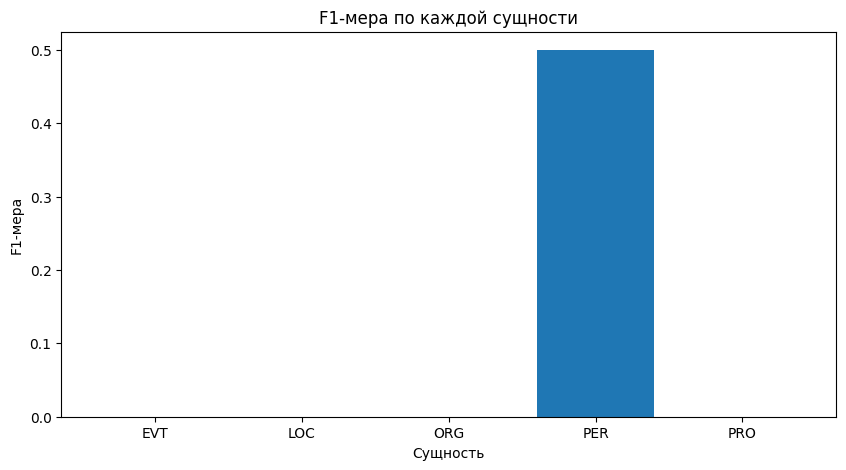

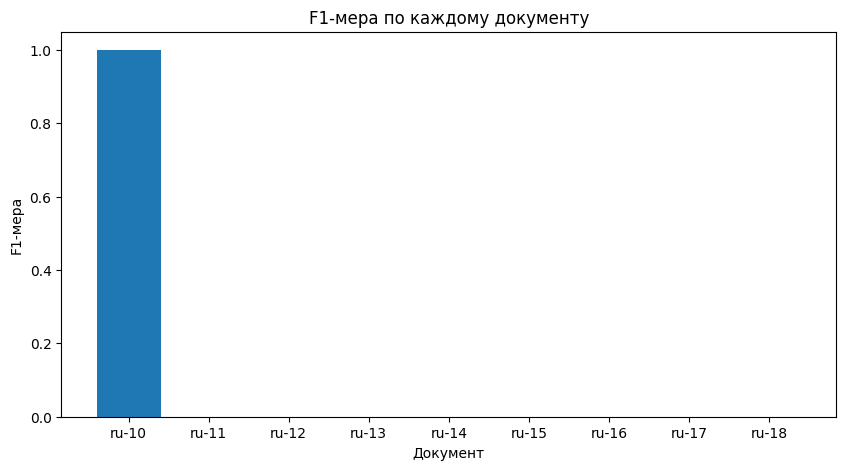

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Загрузка датафрейма
df = pd.read_csv('brexit_news_with_gigachat.csv')

# Вычисление F1-меры для каждой строки
df['f1_score'] = df.apply(lambda row: score_fn(row['gold_answer'], row['gigachat_answer']), axis=1)

# Агрегация результатов по каждой сущности
entity_f1 = df.groupby('entity')['f1_score'].mean()
print(entity_f1)

# Агрегация результатов по каждому документу
document_f1 = df.groupby('document_id')['f1_score'].mean()
print(document_f1)

# Визуализация результатов
plt.figure(figsize=(10, 5))
plt.bar(entity_f1.index, entity_f1.values)
plt.title('F1-мера по каждой сущности')
plt.xlabel('Сущность')
plt.ylabel('F1-мера')
plt.show()

plt.figure(figsize=(10, 5))
plt.bar(document_f1.index, document_f1.values)
plt.title('F1-мера по каждому документу')
plt.xlabel('Документ')
plt.ylabel('F1-мера')
plt.show()


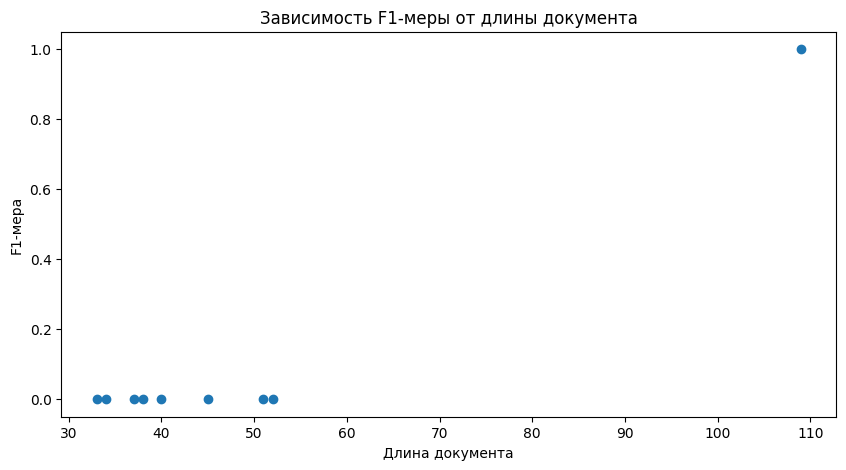

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Загрузка датафрейма
df = pd.read_csv("brexit_news_with_gigachat.csv")

# Вычисление F1-меры для каждой строки
df['f1_score'] = df.apply(lambda row: score_fn(row['gold_answer'], row['gigachat_answer']), axis=1)

# Вычисление длины каждого документа
df['document_length'] = df['document_text'].apply(len)

# Построение графика зависимости F1-меры от длины документа
plt.figure(figsize=(10, 5))
plt.scatter(df['document_length'], df['f1_score'])
plt.title('Зависимость F1-меры от длины документа')
plt.xlabel('Длина документа')
plt.ylabel('F1-мера')
plt.show()


In [25]:
import pandas as pd

# Загрузка датафрейма
df = pd.read_csv('brexit_news_with_gigachat.csv')

# Функция для анализа ошибок
def analyze_errors(gold: str, pred: str) -> str:
 """
 Функция для анализа ошибок.

 Args:
   gold: Строка с правильными сущностями.
   pred: Строка с предсказанными сущностями.

 Returns:
   Описание ошибок.
 """
 gold_entities = set(gold.split())
 pred_entities = set(pred.split())

 errors = []

 # Пропущенные сущности
 missing_entities = gold_entities - pred_entities
 if missing_entities:
  errors.append(f"Пропущенные сущности: {', '.join(missing_entities)}")

 # Неправильные границы
 incorrect_boundaries = [entity for entity in pred_entities if entity not in gold_entities]
 if incorrect_boundaries:
  errors.append(f"Неправильные границы: {', '.join(incorrect_boundaries)}")

 # Неправильная классификация
 misclassified_entities = [entity for entity in pred_entities if entity in gold_entities and entity.split(':')[0] != gold_entities.intersection(pred_entities).pop().split(':')[0]]
 if misclassified_entities:
  errors.append(f"Неправильная классификация: {', '.join(misclassified_entities)}")

 # Неверные ответы
 incorrect_answers = [entity for entity in pred_entities if entity not in gold_entities and entity not in incorrect_boundaries]
 if incorrect_answers:
  errors.append(f"Неверные ответы: {', '.join(incorrect_answers)}")

 return ', '.join(errors) if errors else "Нет ошибок"

# Создание столбца с ошибками
df['errors'] = df.apply(lambda row: analyze_errors(row['gold_answer'], row['gigachat_answer']), axis=1)

# Вывод результатов
print(df[['document_id', 'gold_answer', 'gigachat_answer', 'errors']])


  document_id  gold_answer                                    gigachat_answer  \
0       ru-10   Тереза Мэй                                         Тереза Мэй   
1       ru-11  Организация  Association for Computational Linguistics (ACL...   
2       ru-12      Локация  В этом файле не упоминаются географические мес...   
3       ru-13      Событие  Данные о жилье в Калифорнии из переписи населе...   
4       ru-14      Продукт    В этом файле не упоминаются продукты или услуги   
5       ru-15      Персона            В этом файле не упоминаются имена людей   
6       ru-16  Организация            В этом файле не упоминаются организации   
7       ru-17      Локация  В предоставленном тобой тексте нет информации ...   
8       ru-18      Событие                В этом файле не упоминаются события   

                                              errors  
0                    Неправильная классификация: Мэй  
1  Пропущенные сущности: Организация, Неправильны...  
2  Пропущенные сущности:

In [26]:
import pandas as pd
import os

def prepare_text_for_llm(row):
 """
 Функция для подготовки текста для LLM.

 Args:
   row: Строка датафрейма.

 Returns:
   Текст входного сообщения для LLM.
 """
 file_path = row['document_text']
 entity = row['entity']

 # Read the file contents
 try:
  with open(file_path, 'r', encoding='utf-8') as file:
   document_text = file.read()
 except FileNotFoundError:
  document_text = "Файл не найден: " + file_path

 return f"Извлеките сущности типа '{entity}' из текста: '{document_text}'"

# Функция для анализа ошибок
def analyze_errors(gold: str, pred: str) -> str:
 """
 Функция для анализа ошибок.

 Args:
   gold: Строка с правильными сущностями.
   pred: Строка с предсказанными сущностями.

 Returns:
   Описание ошибок.
 """
 gold_entities = set(gold.split())
 pred_entities = set(pred.split())

 errors = []

 # Пропущенные сущности
 missing_entities = gold_entities - pred_entities
 if missing_entities:
  errors.append(f"Пропущенные сущности: {', '.join(missing_entities)}")

 # Неправильные границы
 incorrect_boundaries = [entity for entity in pred_entities if entity not in gold_entities]
 if incorrect_boundaries:
  errors.append(f"Неправильные границы: {', '.join(incorrect_boundaries)}")

 # Неправильная классификация
 misclassified_entities = [entity for entity in pred_entities if entity in gold_entities and entity.split(':')[0] != gold_entities.intersection(pred_entities).pop().split(':')[0]]
 if misclassified_entities:
  errors.append(f"Неправильная классификация: {', '.join(misclassified_entities)}")

 # Неверные ответы
 incorrect_answers = [entity for entity in pred_entities if entity not in gold_entities and entity not in incorrect_boundaries]
 if incorrect_answers:
  errors.append(f"Неверные ответы: {', '.join(incorrect_answers)}")

 return ', '.join(errors) if errors else "Нет ошибок"

# Пример чтения датасета
data = {
  'document_id': ['ru-10', 'ru-11', 'ru-12', 'ru-13', 'ru-14', 'ru-15', 'ru-16', 'ru-17', 'ru-18'],
  'document_text': [
    r"C:\Users\User\Downloads\document_tereza-mej-rasschityvaet-usidet-v-sedle-do-zaversheniia-procedury-brexit.txt",
    r"C:\Users\User\Downloads\output.txt",
    r"C:\Users\User\Downloads\mnist_train_small.csv",
    r"C:\Users\User\Downloads\README.md",
    r"C:\Users\User\Downloads\mnist_test.csv",
    r"C:\Users\User\Downloads\anscombe.json",
    r"C:\Users\User\Downloads\california_housing_test.csv",
    r"C:\Users\User\Downloads\california_housing_train.csv",
    r"C:\Users\User\Downloads\another_file.txt"
  ],
  'entity': ['PER', 'ORG', 'LOC', 'EVT', 'PRO', 'PER', 'ORG', 'LOC', 'EVT'],
  'gold_answer': [
    "Тереза Мэй",
    "Организация",
    "Локация",
    "Событие",
    "Продукт",
    "Персона",
    "Организация",
    "Локация",
    "Событие"
  ]
}
df = pd.DataFrame(data)

df['llm_prompt'] = df.apply(prepare_text_for_llm, axis=1)

# Добавление ответов GigaChat (вручную)
df['gigachat_answer'] = [
  "Тереза Мэй",
  "Association for Computational Linguistics (ACL), Special Interest Group on Slavic Natural Language Processing (SIGSLAV), Florence, Italy, 7th Workshop on Balto-Slavic Natural Language Processing, 57th Annual Meeting of the ACL",
  "В этом файле не упоминаются географические места или локации",
  "Данные о жилье в Калифорнии из переписи населения США 1990 года, небольшая выборка из базы данных MNIST, данные из Anscombe's quartet",
  "В этом файле не упоминаются продукты или услуги",
  "В этом файле не упоминаются имена людей",
  "В этом файле не упоминаются организации",
  "В предоставленном тобой тексте нет информации о локациях.",
  "В этом файле не упоминаются события"
]

# Создание столбца с ошибками
df['errors'] = df.apply(lambda row: analyze_errors(row['gold_answer'], row['gigachat_answer']), axis=1)

# Сохранение датафрейма в CSV-файл
df.to_csv('brexit_news_with_gigachat_and_errors.csv', index=False)

In [27]:
!ls

brexit_news_with_gigachat_and_errors.csv  brexit_news_with_gigachat.csv  sample_data
